In [75]:
import numpy as np
import scipy as sp

import random

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


## Make Y_0

In [201]:
# normal dist
N = 10000
mean = 75
std = 10
y_0 = np.random.normal(loc=3*mean/4, scale=std, size=N) + np.random.uniform((mean/4)-std/4, (mean/2)+std/4, size=N)
y_0 = np.round(y_0, 2)

C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


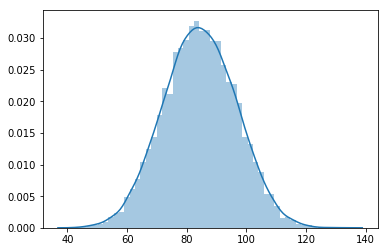

In [202]:
sns.distplot(y_0)

## Make Treatment Effect and Y_1

In [203]:
true_treatment_effect_mean = 10
true_treatment_effect = np.round(np.random.normal(loc=true_treatment_effect_mean, scale=0.1, size=N) 
                         + np.random.uniform(-true_treatment_effect_mean/20, true_treatment_effect_mean/20, size=N),2)

C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


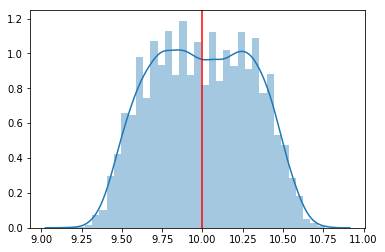

In [204]:
sns.distplot(true_treatment_effect)
plt.axvline(true_treatment_effect.mean(), color = 'r')
plt.show()

In [205]:
y_1 = y_0 + true_treatment_effect

C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


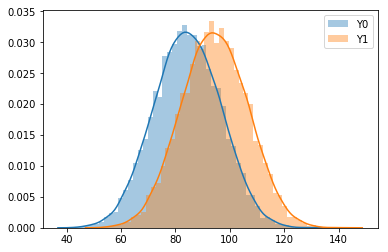

In [206]:
sns.distplot(y_0, label='Y0')
sns.distplot(y_1, label='Y1')
plt.legend()
plt.show()

## Add Never Buyers, conditional buyers, and do not disturbs

C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


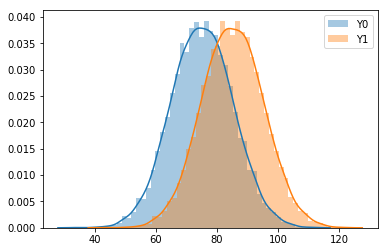

In [8]:
sns.distplot(y_0, label='Y0')
sns.distplot(y_1, label='Y1')
plt.legend()
plt.show()

C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


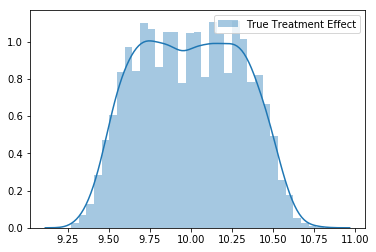

In [9]:
sns.distplot(true_treatment_effect[true_treatment_effect>0], label='True Treatment Effect')
plt.legend()
plt.show()

## END OF DAT GEN

In [207]:
price_of_treatment = 5
print('Profit when doing nothing: {}'.format(y_0.sum()))
print('Profit when targeting all: {}'.format(y_1.sum() - (price_of_treatment*N)))

Profit when doing nothing: 843820.73
Profit when targeting all: 893785.88


In [208]:
true_treatment_effect_mean

10

## Classical RCT

In [209]:
rct_outcome = y_0.copy() # initialise outcome with y0
rct_indices = np.random.choice(a = np.arange(y_0.size), 
                                      size = int(y_0.size * 0.5), replace = False)
rct_outcome[rct_indices] = y_1[rct_indices]
rct_mask = np.ones_like(y_0, dtype=bool)
rct_mask[rct_indices] = False

In [13]:
#outcome
print('Estimated Treatment Effect: {}'.format(rct_outcome[~rct_mask].mean() - rct_outcome[rct_mask].mean()))
print('True Treatment Effect:      {}'.format(true_treatment_effect.mean()))
print('Profit:         {}'.format(rct_outcome.sum()))
print('Targeting none: {}'.format(y_0.sum()))
print('Targeting all:  {}'.format(y_1.sum()))

Estimated Treatment Effect: 10.072075999999996
True Treatment Effect:      9.992238
Profit:         801123.78
Targeting none: 751168.72
Targeting all:  851091.1000000001


C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


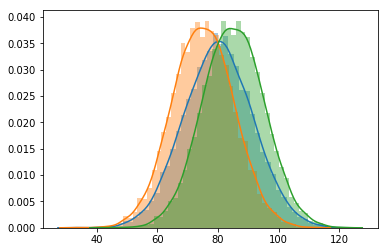

In [14]:
sns.distplot(rct_outcome)
sns.distplot(y_0)
sns.distplot(y_1)
plt.show()

C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


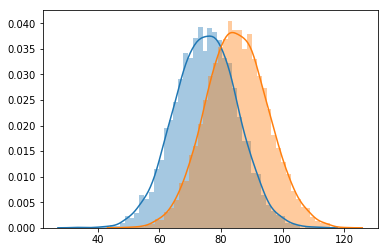

In [15]:
sns.distplot(rct_outcome[rct_mask])
sns.distplot(rct_outcome[(~rct_mask)])
plt.show()

## Imbalanced Targeting

In [16]:
imb_ratio = 0.80
imb_outcome = y_0.copy() # initialise outcome with y0
imb_indices = np.random.choice(a = np.arange(y_0.size), 
                                      size = int(y_0.size * imb_ratio), replace = False)
imb_outcome[imb_indices] = y_1[imb_indices]
imb_mask = np.ones_like(y_0, dtype=bool)
imb_mask[imb_indices] = False

In [17]:
#outcome
print('Estimated Treatment Effect: {}'.format(imb_outcome[~imb_mask].mean() - imb_outcome[imb_mask].mean()))
print('True Treatment Effect:      {}'.format(true_treatment_effect.mean()))
print('Profit:         {}'.format(imb_outcome.sum()))
print('Targeting none: {}'.format(y_0.sum()))
print('Targeting all:  {}'.format(y_1.sum()))

Estimated Treatment Effect: 10.150211250000012
True Treatment Effect:      9.992238
Profit:         831126.3399999999
Targeting none: 751168.72
Targeting all:  851091.1000000001


# Propensity Score Weighting

### 'Uplift' Model
To assign propensity scores, we need an uplift model.
Here we simulate having one by adding noise to our true effect
t_hat = t_true + gaussian noise + sin noise + uniform noise + bias

In [247]:
bias = -1
pred_uplift = np.round(true_treatment_effect 
                       + np.random.normal(loc = 0, scale=true_treatment_effect_mean/50,size=N)
                       + np.sin(true_treatment_effect)/10
                       + np.random.uniform(-true_treatment_effect_mean/50, true_treatment_effect_mean/50, size=N)
                       + bias
                       ,2)
pred_uplift = np.where(pred_uplift<0, 0, pred_uplift)

C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


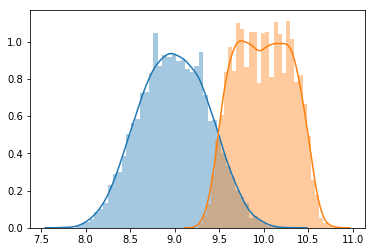

In [19]:
sns.distplot(pred_uplift, label='Uplift Model')
sns.distplot(true_treatment_effect, label='True')
plt.show()

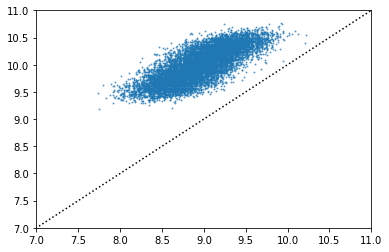

In [248]:
plt.scatter(x=pred_uplift, y=true_treatment_effect, s=1, alpha = 0.6)
plt.plot(np.arange(120)/10, np.arange(120)/10, c='black', linestyle=':')
plt.xlim(7,11)
plt.ylim(7,11)
plt.show()

In [249]:
sp.stats.pearsonr(pred_uplift, true_treatment_effect)

(0.77628144939505, 0.0)

In [250]:
pred_uplift.mean()

8.942594999999999

In [251]:
true_treatment_effect.mean()

9.996514999999999

### Assigning Propensity Scores
Min max scale to [0,1]

In [265]:
assigned_prop_scores = (pred_uplift-pred_uplift.min()+0.01)/(pred_uplift.max()-pred_uplift.min()+0.01)

C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


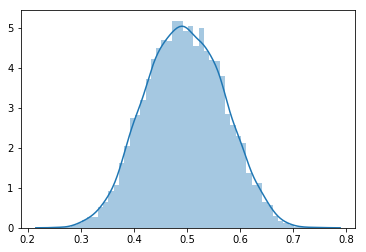

In [263]:
sns.distplot((assigned_prop_scores/2)+.25)
plt.show()

In [69]:
assigned_prop_scores

array([0.44705882, 0.49803922, 0.88627451, ..., 0.54901961, 0.32941176,
       0.58823529])

C:\Users\justi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


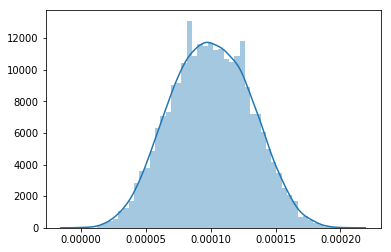

0.4910737254901962 It works, I swear.


In [25]:
sns.distplot(assigned_prop_scores/assigned_prop_scores.sum())
# plt.axvline(assigned_prop_scores.mean())
plt.show()
print(assigned_prop_scores.mean(),'It works, I swear.')

### Assign Treatment based on prop score
Prop Score Targeting (PST)

In [26]:
pst_ratio=0.8
pst_indices = np.random.choice(np.arange(y_0.size), size=int(N*pst_ratio), replace=False, p=assigned_prop_scores/assigned_prop_scores.sum())

In [113]:
pst_outcome = y_0.copy()
pst_outcome[pst_indices] = y_1[pst_indices]
pst_mask = np.zeros(y_0.size, dtype=bool)
pst_mask[pst_indices] = True

In [316]:
#prop score weighing
pst_mask_alt = np.array([random.random()<=prob for prob in assigned_prop_scores])

# weights for targeted
weights_targeted = np.array([1/p for p in assigned_prop_scores[pst_mask_alt]])
weights_not_targeted = np.array([1/p for p in assigned_prop_scores[~pst_mask_alt]])

pst_outcome_alt = y_0.copy()
pst_outcome_alt[~pst_mask_alt] = pst_outcome_alt[~pst_mask_alt] * weights_not_targeted
pst_outcome_alt[pst_mask_alt] = y_1[pst_mask_alt].copy()
pst_outcome_alt[pst_mask_alt] = pst_outcome_alt[pst_mask_alt] * weights_targeted

In [317]:
print('Estimated Treatment Effect: {}'.format(
    (pst_outcome_alt[pst_mask_alt].mean() / (weights_targeted.mean())) 
    - (pst_outcome_alt[~pst_mask_alt].mean() / (weights_not_targeted.mean()))))

Estimated Treatment Effect: 10.253411759410625


In [304]:
print('Estimated Treatment Effect: {}'.format(pst_outcome_alt[~pst_mask_alt].mean() - pst_outcome_alt[pst_mask_alt].mean()))

Estimated Treatment Effect: -10.349442062208624


In [116]:
#outcome
print('Estimated Treatment Effect: {}'.format(pst_outcome[~pst_mask].mean() - pst_outcome[pst_mask].mean()))
print('Estimated Treatment Effect: {}'.format(pst_outcome_alt[~pst_mask_alt].mean() - pst_outcome_alt[pst_mask_alt].mean()))
print('True Treatment Effect:      {}'.format(true_treatment_effect.mean()))
print('Profit:         {}'.format(pst_outcome.sum()))
print('Profit:         {}'.format(pst_outcome_alt.sum()))
print('Targeting none: {}'.format(y_0.sum()))
print('Targeting all:  {}'.format(y_1.sum()))

Estimated Treatment Effect: -9.707432499999996
Estimated Treatment Effect: -10.132344435131898
True Treatment Effect:      9.992238
Profit:         831333.36
Profit:         800809.6299999999
Targeting none: 751168.72
Targeting all:  851091.1000000001


In [30]:
#outcome
print('PST estimated ATE: {}'.format(pst_outcome[~pst_mask].mean() - pst_outcome[pst_mask].mean()))
print('IMB estimated ATE: {}'.format(imb_outcome[~imb_mask].mean() - imb_outcome[imb_mask].mean()))
print('RCT estimated ATE: {}'.format(rct_outcome[~rct_mask].mean() - rct_outcome[rct_mask].mean()))
print('True ATE:          {}'.format(true_treatment_effect.mean()))
print('')
print('Targeting none: {}'.format(y_0.sum()))
print('Profit PST:     {}'.format(pst_outcome.sum() - (0.5*N*price_of_treatment)))
print('Profit IMB:     {}'.format(imb_outcome.sum()-(imb_ratio*N*price_of_treatment)))
print('Profit RCT:     {}'.format(rct_outcome.sum()-(0.5*N*price_of_treatment)))
print('Targeting all:  {}'.format(y_1.sum()- (1*N*price_of_treatment)))

PST estimated ATE: 9.707432499999996
IMB estimated ATE: 10.150211250000012
RCT estimated ATE: 10.072075999999996
True ATE:          9.992238

Targeting none: 751168.72
Profit PST:     806333.36
Profit IMB:     791126.3399999999
Profit RCT:     776123.78
Targeting all:  801091.1000000001


# Iterated Simulation 

- RCT 
- Imbalanced targeting using 80/20 ratio (IMB_08)
- Imbalanced targeting using 60/20 ratio (IMB_06)
- Propensity score targeting with controlled ratio targeting (PST)
- PST with proper random targeting (PST_alt)
- PST with prop scores scaled to [0.25-0.75] #(assigned_prop_scores/2)+.25 (PST_rescaled)

Recording:
- MSE of ATE
- Profit

for each simulation

In [145]:
# make a results df
results_df = pd.DataFrame(columns=['True_ATE','RCT_ATE', 'RCT_PI','IMB_08_ATE', 'IMB_08_PI', 'IMB_06_ATE', 'IMB_06_PI',
                                   'PST_ATE', 'PST_PI', 'PST_ALT_ATE', 'PST_ALT_PI', 'PST_RESC_ATE', 'PST_RESC_PI'],
                         dtype = 'float')


In [337]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 13 columns):
True_ATE        150 non-null float64
RCT_ATE         150 non-null float64
RCT_PI          150 non-null float64
IMB_08_ATE      150 non-null float64
IMB_08_PI       150 non-null float64
IMB_06_ATE      150 non-null float64
IMB_06_PI       150 non-null float64
PST_ATE         150 non-null float64
PST_PI          150 non-null float64
PST_ALT_ATE     150 non-null float64
PST_ALT_PI      150 non-null float64
PST_RESC_ATE    150 non-null float64
PST_RESC_PI     150 non-null float64
dtypes: float64(13)
memory usage: 21.4 KB


In [ ]:
sim_iterations=1000
for i in range(sim_iterations):
    results_df.loc[i,:]=-99
    #RCT
    rct_outcome = y_0.copy() # initialise outcome with y0
    rct_indices = np.random.choice(a = np.arange(y_0.size), 
                                          size = int(y_0.size * 0.5), replace = False)
    rct_outcome[rct_indices] = y_1[rct_indices]
    rct_mask = np.ones_like(y_0, dtype=bool)
    rct_mask[rct_indices] = False
    results_df.loc[i,'RCT_ATE']=rct_outcome[~rct_mask].mean() - rct_outcome[rct_mask].mean()
    results_df.loc[i,'RCT_PI'] = rct_outcome.sum()-(0.5*N*price_of_treatment)
    #IMB 08
    imb_ratio = 0.80
    imb_outcome = y_0.copy() # initialise outcome with y0
    imb_indices = np.random.choice(a = np.arange(y_0.size), 
                                          size = int(y_0.size * imb_ratio), replace = False)
    imb_outcome[imb_indices] = y_1[imb_indices]
    imb_mask = np.ones_like(y_0, dtype=bool)
    imb_mask[imb_indices] = False
    results_df.loc[i,'IMB_08_ATE'] = imb_outcome[~imb_mask].mean() - imb_outcome[imb_mask].mean()
    results_df.loc[i,'IMB_08_PI'] = imb_outcome.sum()-(imb_ratio*N*price_of_treatment)
    #IMB 06
    imb_ratio = 0.60
    imb_outcome = y_0.copy() # initialise outcome with y0
    imb_indices = np.random.choice(a = np.arange(y_0.size), 
                                          size = int(y_0.size * imb_ratio), replace = False)
    imb_outcome[imb_indices] = y_1[imb_indices]
    imb_mask = np.ones_like(y_0, dtype=bool)
    imb_mask[imb_indices] = False
    results_df.loc[i,'IMB_06_ATE'] = imb_outcome[~imb_mask].mean() - imb_outcome[imb_mask].mean()
    results_df.loc[i,'IMB_06_PI'] = imb_outcome.sum()-(imb_ratio*N*price_of_treatment)
    #PST
    #make pseudo uplift model
    bias = -1
    pred_uplift = np.round(true_treatment_effect 
                           + np.random.normal(loc = 0, scale=true_treatment_effect_mean/50,size=N)
                           + np.random.uniform(-true_treatment_effect_mean/50, true_treatment_effect_mean/50, size=N)
                           + bias
                           ,2)
    pred_uplift = np.where(pred_uplift<0, 0, pred_uplift)
    pst_ratio=0.8
    pst_indices = np.random.choice(np.arange(y_0.size), size=int(N*pst_ratio), replace=False, p=assigned_prop_scores/assigned_prop_scores.sum())
    pst_mask = np.zeros(y_0.size, dtype=bool)
    pst_mask[pst_indices] = True

    # weights for targeted
    weights_targeted = np.array([1/p for p in assigned_prop_scores[pst_mask]])
    weights_not_targeted = np.array([1/p for p in assigned_prop_scores[~pst_mask]])

    pst_outcome = y_0.copy()
    pst_outcome[pst_mask] = y_1[pst_mask].copy()
    results_df.loc[i,'PST_PI'] = pst_outcome.sum()-(pst_mask.mean()*N*price_of_treatment)
    pst_outcome[~pst_mask] = pst_outcome[~pst_mask] * weights_not_targeted
    pst_outcome[pst_mask] = pst_outcome[pst_mask] * weights_targeted
    results_df.loc[i,'PST_ATE'] = ((pst_outcome[pst_mask].mean()/weights_targeted.mean()) 
                                       - pst_outcome[~pst_mask].mean()/weights_not_targeted.mean())

    
    #PST ALT : True random assignment
    pst_alt_mask = np.array([random.random()<=prob for prob in assigned_prop_scores])
    # weights for targeted
    weights_targeted = np.array([1/p for p in assigned_prop_scores[pst_alt_mask]])
    weights_not_targeted = np.array([1/p for p in assigned_prop_scores[~pst_alt_mask]])

    pst_alt_outcome = y_0.copy()
    pst_alt_outcome[pst_alt_mask] = y_1[pst_alt_mask].copy()
    results_df.loc[i,'PST_ALT_PI'] = pst_alt_outcome.sum()-(pst_alt_mask.mean()*N*price_of_treatment)
    pst_alt_outcome[~pst_alt_mask] = pst_alt_outcome[~pst_alt_mask] * weights_not_targeted
    pst_alt_outcome[pst_alt_mask] = pst_alt_outcome[pst_alt_mask] * weights_targeted
    
    results_df.loc[i,'PST_ALT_ATE'] = ((pst_alt_outcome[pst_alt_mask].mean()/weights_targeted.mean()) 
                                       - pst_alt_outcome[~pst_alt_mask].mean()/weights_not_targeted.mean())

    
    #PST Rescaled : True random assignment
    assigned_prop_scores = (assigned_prop_scores/2)+.25 
    pst_resc_mask = np.array([random.random()<=prob for prob in assigned_prop_scores])
    # weights for targeted
    weights_targeted = np.array([1/p for p in assigned_prop_scores[pst_resc_mask]])
    weights_not_targeted = np.array([1/p for p in assigned_prop_scores[~pst_resc_mask]])

    pst_resc_outcome = y_0.copy()
    pst_resc_outcome[pst_resc_mask] = y_1[pst_resc_mask].copy()
    results_df.loc[i,'PST_RESC_PI'] = pst_resc_outcome.sum()-(pst_resc_mask.mean()*N*price_of_treatment)
    
    pst_resc_outcome[~pst_resc_mask] = pst_resc_outcome[~pst_resc_mask] * weights_not_targeted
    pst_resc_outcome[pst_resc_mask] = pst_resc_outcome[pst_resc_mask] * weights_targeted
    
    results_df.loc[i,'PST_RESC_ATE'] = ((pst_resc_outcome[pst_resc_mask].mean()/weights_targeted.mean()) 
                                       - pst_resc_outcome[~pst_resc_mask].mean()/weights_not_targeted.mean())


In [336]:
print('RCT    ',np.round(results_df.RCT_ATE.mean(),4),np.round(results_df.RCT_ATE.std(),4))
print('PST_ALT',np.round(results_df.PST_ALT_ATE.mean(),4),np.round(results_df.PST_ALT_ATE.std(),4))
print('IMB_08 ',np.round(results_df.IMB_08_ATE.mean(),4),np.round(results_df.IMB_08_ATE.std(),4))
print('IMB_06 ',np.round(results_df.IMB_06_ATE.mean(),4),np.round(results_df.IMB_06_ATE.std(),4))

RCT     9.9804 0.2218
PST_ALT 10.2636 0.2453
IMB_08  10.0241 0.2998
IMB_06  10.0458 0.2484


In [408]:
ATE_columns = [e for e in results_df.columns if 'ATE' in e][1:]
PI_columns = [e for e in results_df.columns if 'PI' in e]

In [372]:
results_df[ATE_columns] -= true_treatment_effect.mean()

In [409]:
results_df_ate = results_df[ATE_columns].copy()
results_df_pi = results_df[PI_columns].copy()/1000

In [395]:
results_df_ate.agg(['mean','std', 'sum']).abs().T.sort_values(by='mean')

,mean,std,sum
PST_RESC_ATE,0.000101,0.245597,0.050492
RCT_ATE,0.000298,0.261964,0.148766
IMB_06_ATE,0.001489,0.237707,0.744456
PST_ALT_ATE,0.006162,0.237155,3.080959
IMB_08_ATE,0.011313,0.311531,5.656388
PST_ATE,0.014315,0.301513,7.157276


In [411]:
results_df_pi.agg(['mean','std', 'min', 'max']).T.sort_values(by='mean', ascending=False)

,mean,std,min,max
PST_PI,1807.586435,0.023275,1807.52548,1807.67484
PST_RESC_PI,1762.603232,0.731762,1760.52562,1764.88734
PST_ALT_PI,1762.577991,0.728558,1760.71980,1764.89666
IMB_08_PI,883.792633,0.012682,883.75444,883.83265
IMB_06_PI,873.800206,0.014677,873.74053,873.84399
RCT_PI,868.802837,0.015569,868.75772,868.85182


In [374]:
for c in ATE_columns:
    print(c, results_df[c].mean())

RCT_ATE -0.00029753199999913707
IMB_08_ATE 0.01131277500000067
IMB_06_ATE 0.0014889116666676329
PST_ATE -0.014314552499999878
PST_ALT_ATE 0.006161917048430808
PST_RESC_ATE -0.00010098430158572569
